In [ ]:
import numpy as np

test_data = np.load("/mnt/nas05/data01/francesco/sdo_img2img/sde_mag2mag_v2/progetto_simone/data/pickled_maps/map_2024_1_1_0_0_0.npy", allow_pickle=True)

In [ ]:
test_data

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(test_data[0])

In [ ]:
test_data[0].shape

In [ ]:
np.std(test_data[0])

In [ ]:
import pandas as pd

stats_df = pd.read_csv(r"/mnt/nas05/data01/francesco/sdo_img2img/sde_mag2mag_v2/npy_metrics.csv")

In [ ]:
stats_df['filename'].iloc[0]

In [ ]:
stats_df["timestamp_str"] = stats_df["filename"].str.extract(r"map_(\d+_\d+_\d+_\d+_\d+_\d+)\.npy")


In [ ]:
stats_df["datetime"] = pd.to_datetime(stats_df["timestamp_str"], format="%Y_%m_%d_%H_%M_%S")


In [ ]:
stats_df = stats_df.sort_values(by="datetime", ascending=True)

In [ ]:
(stats_df['mean']).mean(), stats_df['std'].mean()  # or better: use RMS of stds


stats_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

stats = ['std', 'max', 'min', 'mean']
# Plot
for value in stats:
    plt.figure(figsize=(12, 5))
    plt.plot(stats_df['datetime'], stats_df[f'{value}'], color='black')

    # Labels and formatting
    plt.xlabel("Year", fontsize=25)
    plt.ylabel(f"{value}", fontsize=25)
    plt.title(f"{value}", fontsize=25)
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)
    plt.show()
    plt.tight_layout()
    plt.savefig(f"/mnt/nas05/data01/francesco/sdo_img2img/sde_mag2mag_v2/plots/{value}.png")
    plt.close()


In [1]:
import sys
sys.path.append("/mnt/nas05/data01/francesco/progetto_simone/ionosphere")  # add current dir, where src/ is located

from src.data.dataset import IonoDataset

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.6.0+cu124 with CUDA 1204 (you have 2.6.0+cu118)
    Python  3.10.16 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
/mnt/nas05/data01/francesco/progetto_simone/ionosphere/src/vit.py:26: FutureWarning: xformers.components is deprecated and is not maintained anymore. It might be removed in a future version of xFormers 
  import xformers.components.attention.core as xfa


In [ ]:
train_dataset = IonoDataset(
    path="/mnt/nas05/data01/francesco/sdo_img2img/sde_mag2mag_v2/progetto_simone/data/pickled_maps",
    transforms=True,
    split='train',
    seed=42
)

In [ ]:
train_dataset[0]

In [ ]:
import torch
torch.max(train_dataset[0][0]), torch.min(train_dataset[0][0]), torch.mean(train_dataset[0][0]), torch.std(train_dataset[0][0])

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0][0].cpu().numpy())
plt.colorbar()

In [3]:
from src.data.dataset import get_data_objects

train_dataset, train_sampler, train_data_loader = get_data_objects(
    path="/mnt/nas05/data01/francesco/sdo_img2img/sde_mag2mag_v2/progetto_simone/data/pickled_maps",
    batch_size=4,
    distributed=False,
    num_data_workers=1,
    split='train',
    seed=42
)

In [4]:
train_dataset[0]

(tensor([[[ 0.2949,  0.2967,  0.2985,  ...,  0.2888,  0.2909,  0.2930],
          [ 0.5085,  0.5144,  0.5204,  ...,  0.4885,  0.4955,  0.5024],
          [ 0.7907,  0.8027,  0.8148,  ...,  0.7501,  0.7644,  0.7786],
          ...,
          [-0.1932, -0.1905, -0.1878,  ..., -0.2025, -0.1992, -0.1959],
          [-0.2883, -0.2868, -0.2853,  ..., -0.2932, -0.2915, -0.2899],
          [-0.3375, -0.3370, -0.3365,  ..., -0.3389, -0.3384, -0.3379]]]),
 2.07,
 -2.33,
 1.73)

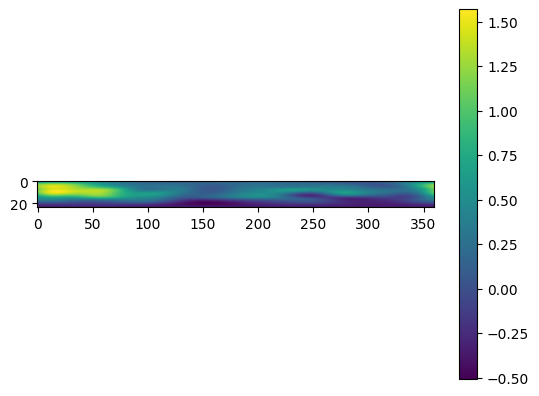

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0][0].cpu().numpy())
plt.colorbar()